In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from preprocessing import DatasetPreprocessing
from model import *

def set_seed(SEED):
    """ Set seed for reproducibility. """
    os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

set_seed(42)

In [2]:
Data = DatasetPreprocessing(path="data", frontal=True, n_max=25, new_size=(256, 256))

# get train and test datasets [(X_train, y_train_gender, y_train_age), (X_test, y_test, y_train_gender, y_train_age)]
#train_test_ds = Data.get_train_test_datasets(test_size=0.3, random_state=42) # use for 70/30 split
train_test_ds = Data.get_cv_splits(n_splits=5, random_state=42) # use for 5-fold cross validation
[(X_train, gender_train, age_train), (X_test, gender_test, age_test)] = train_test_ds[0]

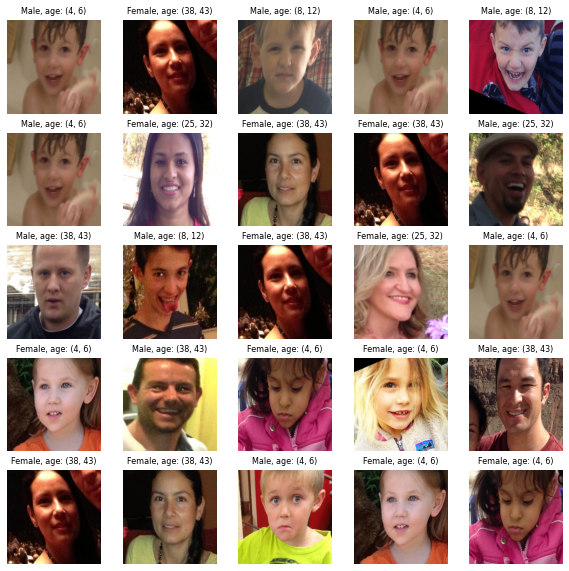

In [3]:
# make subplot of 25 random images from dataset
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(X_train))
        ax[i, j].imshow(X_train[idx])
        ax[i, j].axis("off")
        # make title stating gender and year
        gender = "Female" if Data.get_gender_label(gender_train[idx]) == "f" else "Male"
        age = Data.get_age_label(age_train[idx])
        ax[i, j].set_title(f"{gender}, age: {age}", fontsize = 8)